## Классификация текстов

In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.naive_bayes import MultinomialNB

import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

1. Загрузите датасет 20 newsgroups;
2. Познакомьтесь с описанием и структурой датасета. Описание можно найти в документации.
3. Выведите информацию о количественных параметрах датасета;

In [2]:
news = fetch_20newsgroups(subset='all')
print(news.DESCR)

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`~sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality

In [3]:
news.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [4]:
print(f'filenames: {news.filenames.shape}')
print(f'target: {news.target.shape}')
print(f'len target_names: {len(news.target_names)}')
print(f'len data: {len(news.data)}')
print(f'target_names: {news.target_names}')

filenames: (18846,)
target: (18846,)
len target_names: 20
len data: 18846
target_names: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


4. Выведите несколько точек датасета (сами текстовые фрагменты и значение целевой переменной);


In [5]:
for i in [5, 25, 55]:
    print(f'------------------\n{news.target_names[news.target[i]]} =>\n------------------\n{news.data[i]}\n\n')

------------------
sci.electronics =>
------------------
From: tell@cs.unc.edu (Stephen Tell)
Subject: Re: subliminal message flashing on TV
Organization: The University of North Carolina at Chapel Hill
Lines: 25
NNTP-Posting-Host: rukbat.cs.unc.edu

In article <7480237@hpfcso.FC.HP.COM> myers@hpfcso.FC.HP.COM (Bob Myers) writes:
>> Hi.  I was doing research on subliminal suggestion for a psychology
>> paper, and I read that one researcher flashed hidden messages on the
>> TV screen at 1/200ths of a second.  Is that possible?

> Might
>even be a vector ("strokewriter") display, in which case the lower limit
>on image time is anyone's guess (and is probably phosphor-persistence limited).

Back in high school I worked as a lab assistant for a bunch of experimental
psychologists at Bell Labs.  When they were doing visual perception and
memory experiments, they used vector-type displays, with 1-millisecond
refresh rates common.

So your case of 1/200th sec is quite practical, and the exper

5. Разделите эти данные на тестовую и обучающую выборки;


In [6]:
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')

6. Постройте модель наивного байесовского для классификации текстов;


In [7]:
vectorizer = CountVectorizer()
vectors_train = vectorizer.fit_transform(newsgroups_train.data)
vectors_test = vectorizer.transform(newsgroups_test.data)

In [8]:
clf = MultinomialNB(alpha=.005)
clf.fit(vectors_train, newsgroups_train.target)

MultinomialNB(alpha=0.005)

In [9]:
pred_train = clf.predict(vectors_train)
pred_test = clf.predict(vectors_test)

7. Оцените качество модели на тестовой выборке с помощью следующих метрик:
   - достоверность предсказания (accuracy);
   - точность (precision);
   - полнота (recall);

In [10]:
# accuracy - процент верных предсказаний
print('ACCURACY')
print(accuracy_score(newsgroups_train.target, pred_train))
print(accuracy_score(newsgroups_test.target, pred_test))

# precision - сколько верных среди предсказанных ("Класс 1/да")
print('\nPRECISION')
print(precision_score(newsgroups_train.target, pred_train, average='macro'))
print(precision_score(newsgroups_test.target, pred_test, average='macro'))

# recall - сколько из настоящих "Класс 1/да" определены верно
print('\nRECALL')
print(recall_score(newsgroups_train.target, pred_train, average='macro'))
print(recall_score(newsgroups_test.target, pred_test, average='macro'))

ACCURACY
0.9722467739084321
0.8023101433882103

PRECISION
0.9760827853496064
0.8065317141953295

RECALL
0.9732095810545947
0.7985182930988934


8. Постройте кривую обучения - график зависимости тестовой и обучающей эффективности от размера обучающей выборки.

In [11]:
trainings, tests, size = [], [], np.linspace(0.6, 0.1, num=20)

for test_size in np.linspace(0.6, 0.1, num=20):
    newsgroups_data_train, newsgroups_data_test, newsgroups_target_train, newsgroups_target_test = train_test_split(news.data,
                                                    news.target, test_size=test_size)
    
    vectorizer = CountVectorizer()
    vectors_train = vectorizer.fit_transform(newsgroups_data_train)
    vectors_test = vectorizer.transform(newsgroups_data_test)
    
    clf = MultinomialNB(alpha=.005)
    clf.fit(vectors_train, newsgroups_target_train)
    
    trainings.append(clf.score(vectors_train, newsgroups_target_train))
    tests.append(clf.score(vectors_test, newsgroups_target_test))

Text(0, 0.5, 'Точность')

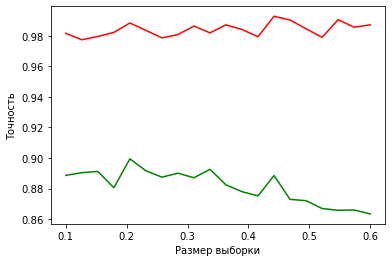

In [12]:
fig, ax = plt.subplots()
ax.plot(size, trainings, "r")
ax.plot(size, tests, "g")
ax.set_xlabel("Размер выборки")
ax.set_ylabel("Точность")

9. Сделайте вывод о применимости модели.

Модель с увеличением выборки при знакомых данных дает результат, близкий к 100%, а вот с неизвествными -- 90% и ниже. Результат метрики находится в пределах хороших, и падает не так уж быстро, так что модель полученная вполне хорошая и применима. 

## Дополнительные задания



1. Постройте модели классификации для данной задачи на основе следующих методов:
    - логистическая регрессия (LogisticRegression);
    - метод опорных векторов с гауссовым ядром (SVC);
    - метод опорных векторов с полиномиальным ядром (SVC);
    - метод k ближайших соседей (KNeighborsClassifier);
    - многослойный перцептрон (MLP);
    
2. Проанализируйте метрики каждой модели и сделайте выводы об их эффективности и применимости. Сравните эффективность всех этих моделей и выберите лучшую;

4. Сделайте замеры времени обучения для каждой модели. Сделайте вывод о сравнительной производительности моделей.



1️⃣ логистическая регрессия (LogisticRegression)

In [13]:
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')

vectorizer = CountVectorizer()
vectors_train = vectorizer.fit_transform(newsgroups_train.data)
vectors_test = vectorizer.transform(newsgroups_test.data)

In [14]:
%%time
lr = LogisticRegression(max_iter=100).fit(vectors_train, newsgroups_train.target)
pred_train = lr.predict(vectors_train)
pred_test = lr.predict(vectors_test)

CPU times: user 1min 36s, sys: 2.38 s, total: 1min 38s
Wall time: 54.5 s


In [15]:
print('ACCURACY')
print(accuracy_score(newsgroups_train.target, pred_train))
print(accuracy_score(newsgroups_test.target, pred_test))

print('\nPRECISION')
print(precision_score(newsgroups_train.target, pred_train, average='macro'))
print(precision_score(newsgroups_test.target, pred_test, average='macro'))

print('\nRECALL')
print(recall_score(newsgroups_train.target, pred_train, average='macro'))
print(recall_score(newsgroups_test.target, pred_test, average='macro'))

ACCURACY
0.9996464557185788
0.7902283590015932

PRECISION
0.9996564858035839
0.7887775312957979

RECALL
0.9996380821859224
0.7838192551864072


2️⃣ метод опорных векторов с гауссовым ядром (SVC)

In [33]:
%%time
SVC_rbf = SVC(C=1.0, kernel='rbf', degree=2, gamma='auto').fit(vectors_train, newsgroups_train.target)

pred_train = SVC_rbf.predict(vectors_train)
pred_test = SVC_rbf.predict(vectors_test)

CPU times: user 12min 18s, sys: 7.61 s, total: 12min 25s
Wall time: 13min 22s


In [34]:
print('ACCURACY')
print(accuracy_score(newsgroups_train.target, pred_train))
print(accuracy_score(newsgroups_test.target, pred_test))

print('\nPRECISION')
print(precision_score(newsgroups_train.target, pred_train, average='macro'))
print(precision_score(newsgroups_test.target, pred_test, average='macro'))

print('\nRECALL')
print(recall_score(newsgroups_train.target, pred_train, average='macro'))
print(recall_score(newsgroups_test.target, pred_test, average='macro'))

ACCURACY
0.10809616404454658
0.09360063728093468

PRECISION
0.5014700126403331
0.331073157183304

RECALL
0.10427028459413265
0.09034132215804044


3️⃣ метод опорных векторов с полиномиальным ядром (SVC)

In [18]:
%time
SVC_pol = SVC(degree=2, kernel='poly').fit(vectors_train, newsgroups_train.target)

pred_train = SVC_pol.predict(vectors_train)
pred_test = SVC_pol.predict(vectors_test)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 4.77 µs


In [19]:
print('ACCURACY')
print(accuracy_score(newsgroups_train.target, pred_train))
print(accuracy_score(newsgroups_test.target, pred_test))

print('\nPRECISION')
print(precision_score(newsgroups_train.target, pred_train, average='macro'))
print(precision_score(newsgroups_test.target, pred_test, average='macro'))

print('\nRECALL')
print(recall_score(newsgroups_train.target, pred_train, average='macro'))
print(recall_score(newsgroups_test.target, pred_test, average='macro'))

ACCURACY
0.06664309704790525
0.06120552310143388

PRECISION
0.6469094225443538
0.37645708728446525

RECALL
0.06375259969846966
0.05844430412883748


4️⃣ метод k ближайших соседей (KNeighborsClassifier)

In [20]:
%time
knn = KNeighborsClassifier(n_neighbors=1).fit(vectors_train, newsgroups_train.target)

pred_train = knn.predict(vectors_train)
pred_test = knn.predict(vectors_test)

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 23.1 µs


In [21]:
print('ACCURACY')
print(accuracy_score(newsgroups_train.target, pred_train))
print(accuracy_score(newsgroups_test.target, pred_test))

print('\nPRECISION')
print(precision_score(newsgroups_train.target, pred_train, average='macro'))
print(precision_score(newsgroups_test.target, pred_test, average='macro'))

print('\nRECALL')
print(recall_score(newsgroups_train.target, pred_train, average='macro'))
print(recall_score(newsgroups_test.target, pred_test, average='macro'))

ACCURACY
0.9999116139296447
0.3951141795007966

PRECISION
0.9999159663865547
0.42611889813341397

RECALL
0.9999163879598661
0.39494507201997675


5️⃣ многослойный перцептрон (MLP)

In [22]:
%time
mlp = MLPClassifier(solver='lbfgs', alpha=.005,
                     hidden_layer_sizes=(50,35), random_state=1).fit(vectors_train, newsgroups_train.target)

pred_train = mlp.predict(vectors_train)
pred_test = mlp.predict(vectors_test)

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 23.1 µs


In [23]:
print('ACCURACY')
print(accuracy_score(newsgroups_train.target, pred_train))
print(accuracy_score(newsgroups_test.target, pred_test))

print('\nPRECISION')
print(precision_score(newsgroups_train.target, pred_train, average='macro'))
print(precision_score(newsgroups_test.target, pred_test, average='macro'))

print('\nRECALL')
print(recall_score(newsgroups_train.target, pred_train, average='macro'))
print(recall_score(newsgroups_test.target, pred_test, average='macro'))

ACCURACY
0.9999116139296447
0.7602230483271375

PRECISION
0.9999165275459099
0.758658219238529

RECALL
0.9999158249158249
0.7539100548378946


✏️ Самая долгообучаемая модель - метод опорных векторов с гауссовым ядром. У LogisticRegressionнаилучшие метрики на данном датасете (accuracy - 79%, precision - 79%, recall - 78%). 
Метод опорных векторов с полиномиальным ядром (SVC) получилось обучить быстрее всего, при этом результат он дает наихужший результат (как и SVC с гауссовским ядром) (accuracy - 6%, precision - 37%, recall - 6%).   
   
✏️ Тем не менее, с учетом скорости обучения и результат метрик, я бы остановилась на методе многослойном перцептроне (MLP) (accuracy - 76%, precision - 76%, recall - 75%; обучается за 23.1 µs)

3. Для каждой модели из п.3 постройте кривые обучения и диагностируйте недо-/переобучение модели. Попробуйте изменить параметр регуляризации для улучшения результатов модели.




In [24]:
def training_curve(model):
    trainings, tests, size = [], [], np.linspace(0.6, 0.1, num=20)

    for test_size in np.linspace(0.6, 0.1, num=20):
        newsgroups_data_train, newsgroups_data_test, newsgroups_target_train, newsgroups_target_test = train_test_split(news.data,
                                                        news.target, test_size=test_size)

        vectorizer = CountVectorizer()
        vectors_train = vectorizer.fit_transform(newsgroups_data_train)
        vectors_test = vectorizer.transform(newsgroups_data_test)

        clf = MultinomialNB(alpha=.005)
        clf.fit(vectors_train, newsgroups_target_train)

        trainings.append(clf.score(vectors_train, newsgroups_target_train))
        tests.append(clf.score(vectors_test, newsgroups_target_test))
        
    fig, ax = plt.subplots()
    ax.plot(size, trainings, "r")
    ax.plot(size, tests, "g")
    ax.set_xlabel("Размер выборки")
    ax.set_ylabel("Точность")

1️⃣ логистическая регрессия (LogisticRegression)

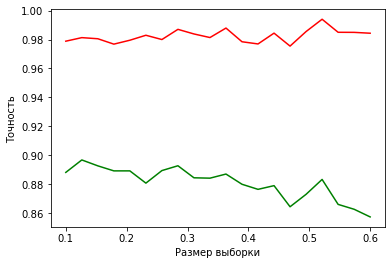

In [25]:
training_curve(lr)

кривая довольно прямая. не вижу здесь переобученность

2️⃣ метод опорных векторов с гауссовым ядром (SVC)

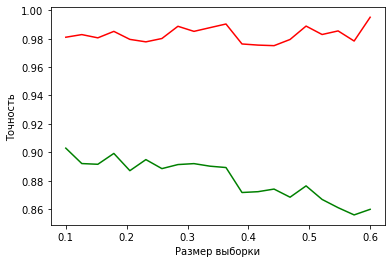

In [26]:
training_curve(SVC_rbf)

кривая довольно прямая. не вижу здесь переобученность

3️⃣ метод опорных векторов с полиномиальным ядром (SVC)

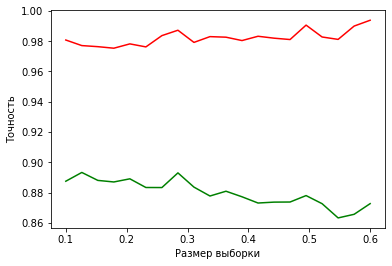

In [27]:
training_curve(SVC_pol)

кривая довольно прямая. не вижу здесь переобученность

4️⃣ метод k ближайших соседей (KNeighborsClassifier)

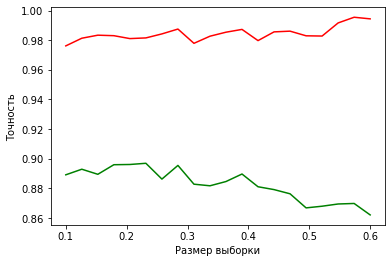

In [28]:
training_curve(knn)

кривая довольно прямая. не вижу здесь переобученность

5️⃣ многослойный перцептрон (MLP)

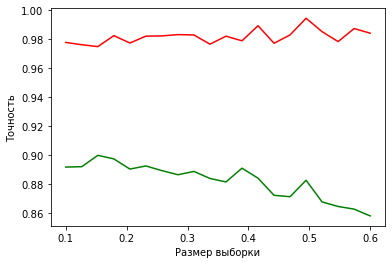

In [29]:
training_curve(mlp)

кривая довольно прямая. не вижу здесь переобученность

## Контрольные вопросы



1. Какие выводы мы можем сделать на основании метрик модели, построенной в данной лабораторной работе?


2. Как представляется текст в методах машинного обучения? Какие основные методы векторизации существуют?



3. Какие задачи существую в области обработки естественных текстов?


4. (*) Что такое текстовые вложения (эмбеддинги)? Как они строятся и зачем применяются?

